In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## Monthly Revenue

In [7]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [8]:
df['InvoiceYearMonth'] = df.InvoiceDate.dt.year*100 + df.InvoiceDate.dt.month
#df['InvoiceYearMonth'] = df.InvoiceDate.dt.to_period('M')

In [9]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012


In [10]:
df['Revenue'] = df.UnitPrice * df.Quantity

In [11]:
df_revenue = df.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


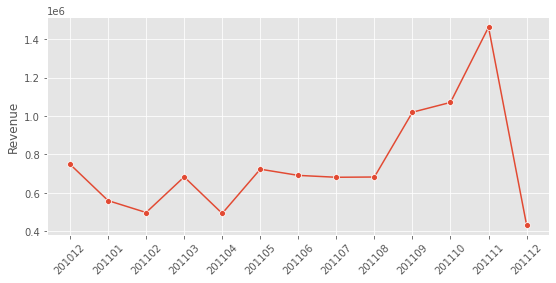

In [12]:
plt.figure(figsize=(9,4))
sns.lineplot(df_revenue.index, df_revenue.Revenue, marker='o')
plt.xticks(df_revenue.index, df_revenue.InvoiceYearMonth, rotation=45);

In [13]:
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()*100

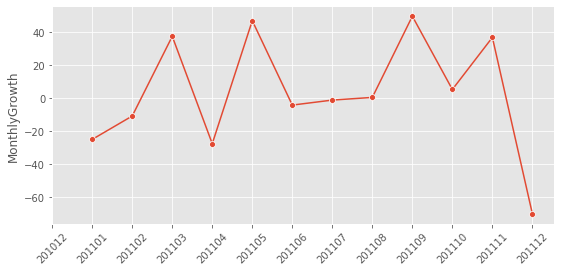

In [14]:
plt.figure(figsize=(9,4))
sns.lineplot(df_revenue.index, df_revenue.MonthlyGrowth, marker='o')
plt.xticks(df_revenue.index, df_revenue.InvoiceYearMonth, rotation=45);

In [15]:
df_revenue

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-25.229320
2,201102,498062.650,-11.060282
3,201103,683267.080,37.184967
4,201104,493207.121,-27.816350
5,201105,723333.510,46.659178
6,201106,691123.120,-4.453048
7,201107,681300.111,-1.421311
8,201108,682680.510,0.202612
9,201109,1019687.622,49.365275


## Monthly Active Customers


In [16]:
uk = df[df.Country == 'United Kingdom'].reset_index(drop=True)

In [17]:
uk_monthly_active = uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
uk_monthly_active['MonthlyGrowth'] = uk_monthly_active['CustomerID'].pct_change()*100

In [18]:
uk_monthly_active

,InvoiceYearMonth,CustomerID,MonthlyGrowth
0,201012,871,NaN
1,201101,684,-21.469575
2,201102,714,4.385965
3,201103,923,29.271709
4,201104,817,-11.484290
5,201105,985,20.563035
6,201106,943,-4.263959
7,201107,899,-4.665960
8,201108,867,-3.559511
9,201109,1177,35.755479


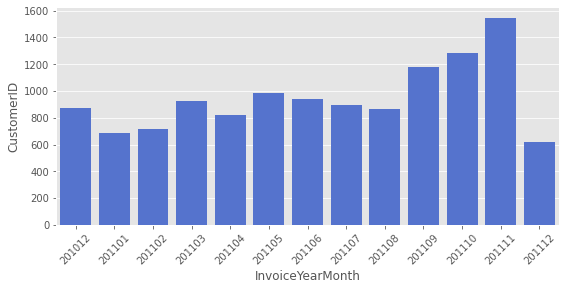

In [19]:
plt.figure(figsize=(9,4))
sns.barplot(uk_monthly_active.InvoiceYearMonth,uk_monthly_active.CustomerID, color='royalblue')
plt.xticks(rotation=45);

## Monthly Order Count


In [20]:
uk_monthly_sales = uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()
uk_monthly_sales['MonthlyGrowth'] = uk_monthly_sales['Quantity'].pct_change()*100

In [21]:
uk_monthly_sales

,InvoiceYearMonth,Quantity,MonthlyGrowth
0,201012,298101,NaN
1,201101,237381,-20.368935
2,201102,225641,-4.945636
3,201103,279843,24.021344
4,201104,257666,-7.924801
5,201105,306452,18.933814
6,201106,258522,-15.640296
7,201107,324129,25.377724
8,201108,319804,-1.334345
9,201109,458490,43.365937


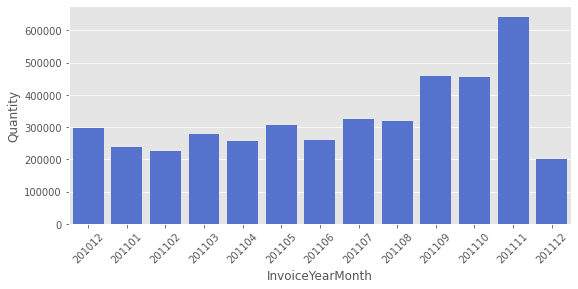

In [22]:
plt.figure(figsize=(9,4))
sns.barplot(uk_monthly_sales.InvoiceYearMonth,uk_monthly_sales.Quantity, color='royalblue')
plt.xticks(rotation=45);

## Average Revenue per Order


In [23]:
uk_monthly_order_avg = uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()
uk_monthly_order_avg['MonthlyGrowth'] = uk_monthly_order_avg['Revenue'].pct_change()*100

In [24]:
uk_monthly_order_avg

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,16.865860,NaN
1,201101,13.614680,-19.276690
2,201102,16.093027,18.203489
3,201103,16.716166,3.872106
4,201104,15.773380,-5.639963
5,201105,17.713823,12.302010
6,201106,16.714748,-5.640086
7,201107,15.723497,-5.930401
8,201108,17.315899,10.127529
9,201109,18.931723,9.331452


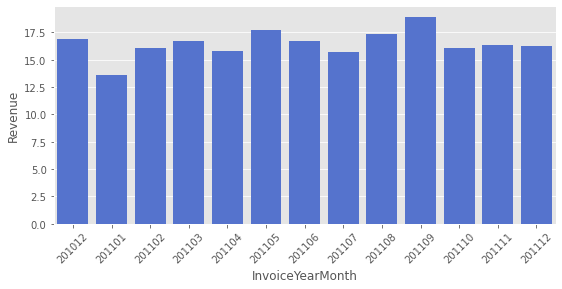

In [25]:
plt.figure(figsize=(9,4))
sns.barplot(uk_monthly_order_avg.InvoiceYearMonth,uk_monthly_order_avg.Revenue, color='royalblue')
plt.xticks(rotation=45);

## New Customer Ratio


In [26]:
uk_min_purchase = uk.groupby('CustomerID').InvoiceDate.min().reset_index()
uk_min_purchase.columns = ['CustomerID','MinPurchaseDate']
uk_min_purchase['MinPurchaseYearMonth'] = uk_min_purchase['MinPurchaseDate'].dt.year*100 + uk_min_purchase['MinPurchaseDate'].dt.month

In [28]:
uk_min_purchase.head(3)

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012


In [29]:
uk = pd.merge(uk, uk_min_purchase, on='CustomerID')

In [30]:
uk['UserType'] = 'New'
uk.loc[uk['InvoiceYearMonth'] > uk['MinPurchaseYearMonth'], 'UserType'] = 'Existing'

In [31]:
uk_user_type_revenue = uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

In [32]:
uk_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.740
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860


In [33]:
uk_user_type_revenue = uk_user_type_revenue.query('InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112')

In [34]:
uk_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


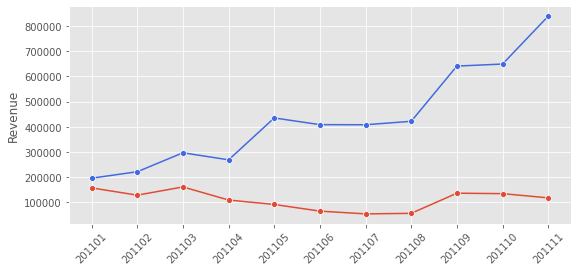

In [35]:
plt.figure(figsize=(9,4))
sns.lineplot(uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'New', 'Revenue'].reset_index().index, 
             uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'New', 'Revenue'], marker='o')

sns.lineplot(uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'Existing', 'Revenue'].reset_index().index, 
             uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'Existing', 'Revenue'], marker='o', color='royalblue')

plt.xticks(uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'Existing', 'Revenue'].reset_index().index, 
           uk_user_type_revenue.loc[uk_user_type_revenue.UserType == 'New', 'InvoiceYearMonth'], rotation=45);

In [36]:
uk_user_ratio = uk[uk.UserType == 'New'].groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / uk[uk.UserType == 'Existing'].groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
uk_user_ratio = uk_user_ratio.reset_index()
uk_user_ratio = uk_user_ratio.dropna()

In [37]:
uk_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


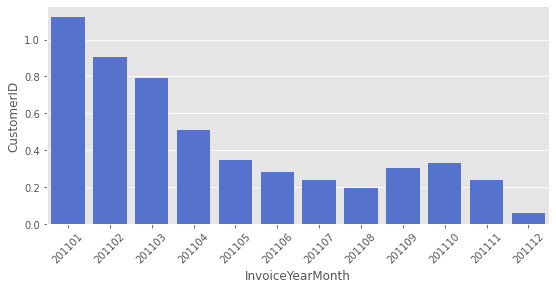

In [38]:
plt.figure(figsize=(9,4))
sns.barplot(uk_user_ratio.InvoiceYearMonth,uk_user_ratio.CustomerID, color='royalblue')
plt.xticks(rotation=45);

## Monthly Retention Rate


In [39]:
uk_user_purchase = uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [40]:
uk_retention_tab = pd.crosstab(uk_user_purchase['CustomerID'], uk_user_purchase['InvoiceYearMonth']).reset_index()

In [41]:
uk_retention_tab.head(3)

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1


In [42]:
uk_retention = pd.DataFrame()
months = uk_retention_tab.columns[2:]    
for i in range(len(months)-1):
    uk_retention.loc[i,'InvoiceYearMonth'] = int(months[i+1])
    uk_retention.loc[i,'TotalUserCount'] = uk_retention_tab[months[i+1]].sum()
    uk_retention.loc[i,'RetainedUserCount'] = uk_retention_tab[(uk_retention_tab[months[i+1]]>0)&(uk_retention_tab[months[i]]>0)][months[i]].sum()
uk_retention = uk_retention.astype(np.int64)

uk_retention['RetentionRate'] = uk_retention['RetainedUserCount'] / uk_retention['TotalUserCount']

In [43]:
uk_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


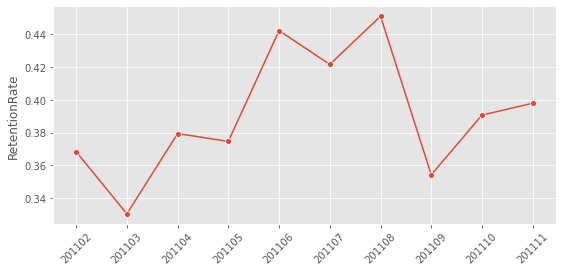

In [44]:
plt.figure(figsize=(9,4))
sns.lineplot(uk_retention.iloc[:10,0].index, uk_retention.iloc[:10,3], marker='o')
plt.xticks(uk_retention.iloc[:10,0].index, uk_retention.iloc[:10,0], rotation=45);

## Cohort Based Retention Rate


In [45]:
uk_3 = uk[['CustomerID', 'InvoiceDate']]

In [46]:
uk_3['FirstOrderMonth'] = uk_3.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
uk_3['OrderMonth'] = uk_3['InvoiceDate'].dt.to_period('M')

In [47]:
uk_3.head(3)

,CustomerID,InvoiceDate,FirstOrderMonth,OrderMonth
0,17850.0,2010-12-01 08:26:00,2010-12,2010-12
1,17850.0,2010-12-01 08:26:00,2010-12,2010-12
2,17850.0,2010-12-01 08:26:00,2010-12,2010-12


In [48]:
uk_cohort = uk_3.groupby(['FirstOrderMonth', 'OrderMonth']).CustomerID.nunique().reset_index(drop=False)

In [49]:
uk_cohort.head(3)

,FirstOrderMonth,OrderMonth,CustomerID
0,2010-12,2010-12,871
1,2010-12,2011-01,322
2,2010-12,2011-02,291


In [50]:
uk_cohort['PeriodNumber'] = (12*(uk_cohort.OrderMonth.dt.year - uk_cohort.FirstOrderMonth.dt.year)
                         + uk_cohort.OrderMonth.dt.month - uk_cohort.FirstOrderMonth.dt.month)

In [51]:
uk_cohort.head(3)

,FirstOrderMonth,OrderMonth,CustomerID,PeriodNumber
0,2010-12,2010-12,871,0
1,2010-12,2011-01,322,1
2,2010-12,2011-02,291,2


In [52]:
cohort_pivot = uk_cohort.pivot_table(index = 'FirstOrderMonth', columns = 'PeriodNumber', values = 'CustomerID')

In [53]:
cohort_pivot

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
FirstOrderMonth,,,,,,,,,,,,,
2010-12,871.0,322.0,291.0,329.0,308.0,345.0,327.0,304.0,306.0,346.0,320.0,429.0,238.0
2011-01,362.0,84.0,101.0,89.0,124.0,106.0,95.0,94.0,114.0,127.0,131.0,54.0,NaN
2011-02,339.0,85.0,65.0,95.0,96.0,86.0,88.0,96.0,94.0,106.0,33.0,NaN,NaN
2011-03,408.0,79.0,107.0,88.0,95.0,70.0,107.0,97.0,119.0,38.0,NaN,NaN,NaN
2011-04,276.0,62.0,61.0,60.0,57.0,64.0,64.0,73.0,23.0,NaN,NaN,NaN,NaN
2011-05,252.0,58.0,43.0,43.0,54.0,60.0,67.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06,207.0,44.0,34.0,51.0,53.0,67.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,172.0,35.0,33.0,40.0,48.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,140.0,37.0,32.0,36.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

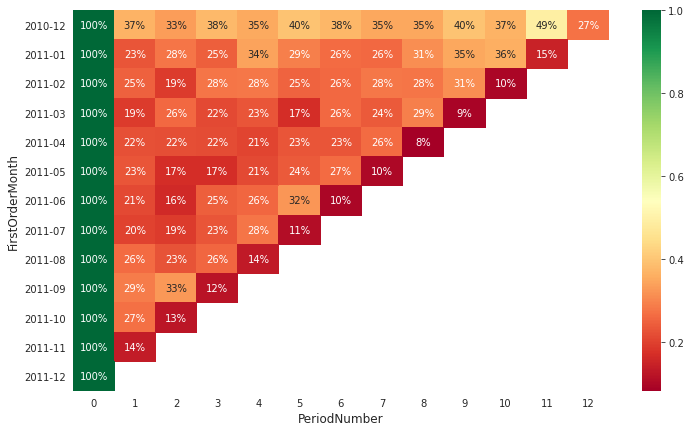

In [55]:
with sns.axes_style('white'):
    plt.figure(figsize=(12,7))
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='RdYlGn');